<hr style='border-top:4px solid #1F77B4;'>

<h2><span style="color: #1F77B4; font-size: 40px">Chapitre 4</span>  </h2>

<h1><span style="color: #1F77B4; font-size: 60px"> Les réseaux de neurones profonds</span> </h1>

<h3><span style="color: #1F77B4; font-size: 50px"> Transfert d'apprentissage</span> </h3>

<hr style='border-top:4px solid #1F77B4;'>

### Importation des bibliothèques

In [1]:
import numpy as np
import tensorflow                    as tf
from tensorflow                      import keras
from tensorflow.keras.models         import Model
from tensorflow.keras                import layers
from tensorflow.keras.layers         import Flatten, Dense, Dropout
from tensorflow.keras.optimizers     import Adam
from tensorflow.keras.datasets       import cifar10
from tensorflow.keras.applications   import VGG16
import matplotlib.pyplot             as plt
from IPython.display                 import display, HTML
import os

<hr style='border-top:4px solid #1F77B4;'>

In [2]:
def save_figure(fig, path):
    # Extraire le répertoire du chemin donné
    directory = os.path.dirname(path)
    
    # Créer le répertoire s'il n'existe pas
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Sauvegarder dans plusieurs formats
    fig.savefig(f"{path}.pdf", format="pdf", bbox_inches='tight')
    fig.savefig(f"{path}.png", format="png", bbox_inches='tight')
    fig.savefig(f"{path}.jpg", format="jpg", bbox_inches='tight')

<hr style='border-top:4px solid #1F77B4;'>

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.7 : Charger le jeu de données CIFAR-10</h3>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normaliser les images (mise à l'échelle des pixels de 0 à 255 à [0, 1])
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convertir les labels en une représentation binaire (one-hot encoding) avec 10 classes
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(f"Forme des données d'entraînement: {x_train.shape}")
print(f"Forme des données de test: {x_test.shape}")

Forme des données d'entraînement: (50000, 32, 32, 3)
Forme des données de test: (10000, 32, 32, 3)


<h3><span style="font-size: 30px">🎴</span> Figure 4.13 : Échantillons de la base de données CIFAR-10 avec leurs classes</h3>

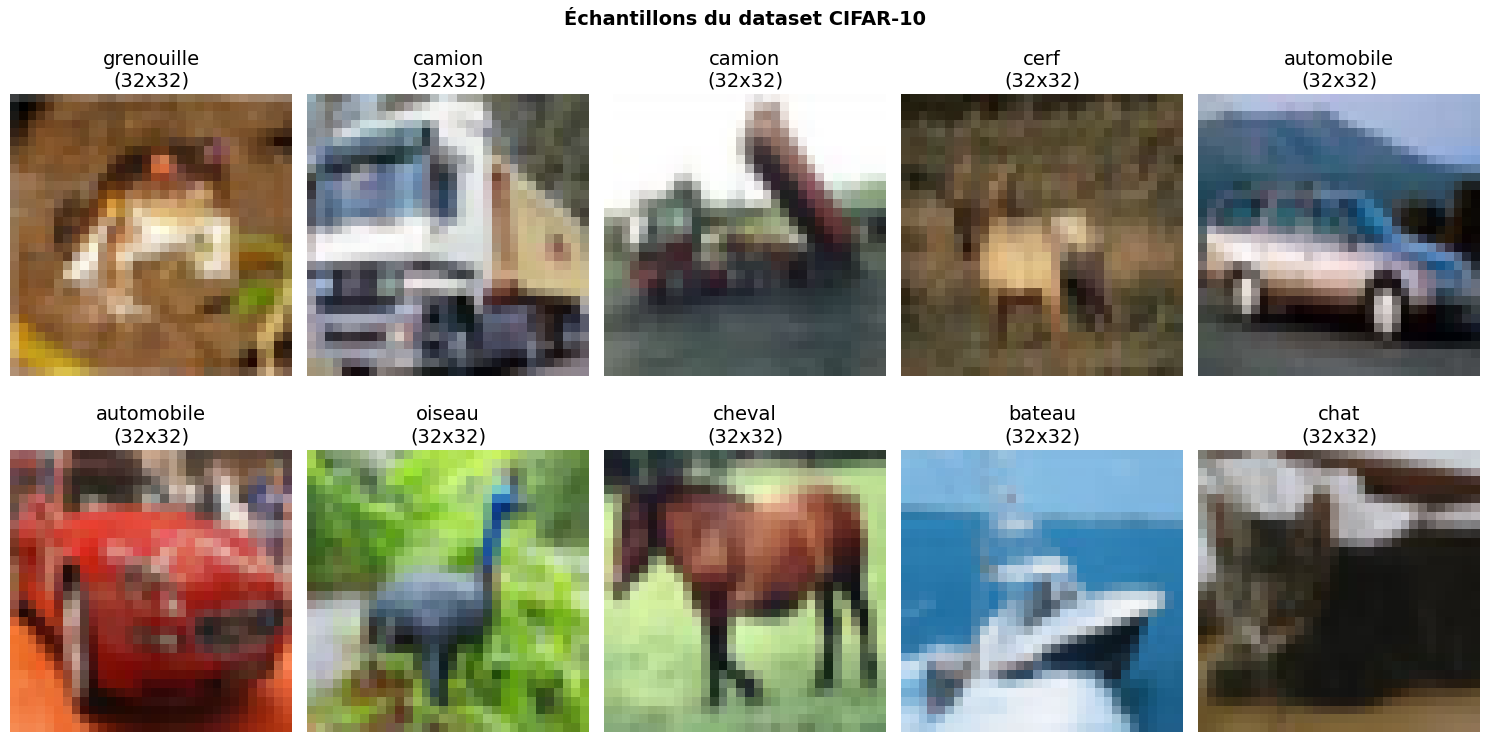

<Figure size 640x480 with 0 Axes>

In [4]:
# Définir les noms des classes CIFAR-10
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']

# Échantillons de la base de données CIFAR-10 avec leurs classes
fig = plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    class_idx = np.argmax(y_train[i])
    plt.title(f'{class_names[class_idx]}\n(32x32)', fontsize=14)
    plt.axis('off')
plt.suptitle('Échantillons du dataset CIFAR-10', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Optimisation de la mise en page
plt.tight_layout()

# Affichage des graphiques
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_4.13/Chap2_Figure_4.13")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.8 : Définition de l'architecture d'un MLP simple entrainées sur les images originales du jeu de données CIFAR</h3>

In [5]:
# Définir l'architecture MLP simple sur images originales 32x32
model_mlp = keras.Sequential(
    [
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ],
    name="MLP_Images32x32"
)

# Compiler le modèle
model_mlp.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

# Afficher l'architecture modèle
model_mlp.summary()

Model: "MLP_Images32x32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Entraîner le modèle MLP simple
epochs = 10
batch_size = 128
history_mlp = model_mlp.fit(x_train, y_train, 
                            batch_size=batch_size, 
                            epochs=epochs, 
                            validation_split=0.2)

# Évaluer le modèle sur les données de test
loss, accuracy = model_mlp.evaluate(x_test, y_test, verbose=0)
print(f"Précision du MLP simple sur les données de test: {accuracy:.4f}")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2577 - loss: 2.0785 - val_accuracy: 0.3359 - val_loss: 1.8749
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3596 - loss: 1.8088 - val_accuracy: 0.3766 - val_loss: 1.7615
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3963 - loss: 1.7135 - val_accuracy: 0.3981 - val_loss: 1.6985
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4150 - loss: 1.6585 - val_accuracy: 0.4020 - val_loss: 1.6823
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4181 - loss: 1.6327 - val_accuracy: 0.4208 - val_loss: 1.6427
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4295 - loss: 1.6049 - val_accuracy: 0.4086 - val_loss: 1.6781
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4394 - loss: 1.5811 - val_accuracy: 0.4132 - val_loss: 1.6448
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4447 - loss: 1.5690 - val_accuracy: 0.

<h3><span style="font-size: 30px">&#128187;</span> VGG16 pré-entraîné</h3>

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.9 : Redimensionner les images pour VGG16 (224x224)</h3>

#### Redimensionner les images pour VGG16 (224x224)

In [7]:
# Redimensionner les images pour VGG16 (224x224)
x_train_resized = tf.image.resize(x_train, [224, 224])
x_test_resized  = tf.image.resize(x_test, [224, 224])

print(f"Forme des données d'entraînement après redimensionnement: {x_train_resized.shape}")
print(f"Forme des données de test après redimensionnement: {x_train_resized.shape}")

Forme des données d'entraînement après redimensionnement: (50000, 224, 224, 3)
Forme des données de test après redimensionnement: (50000, 224, 224, 3)


<h3><span style="font-size: 30px">🎴</span> Figure 4.xx : Échantillons du dataset CIFAR-10 redimensionnés pour VGG16</h3>

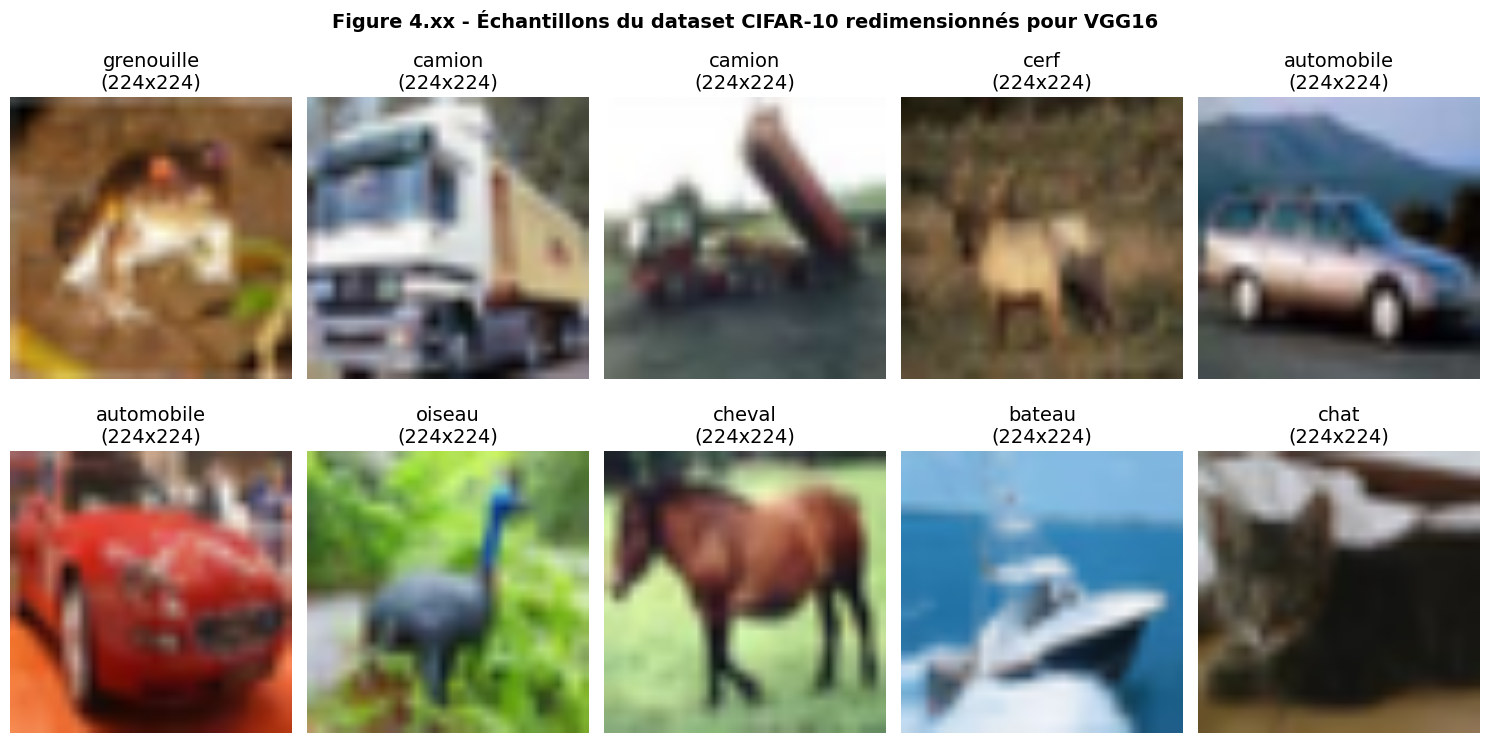

In [8]:
# Définir les noms des classes CIFAR-10
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']

# Afficher quelques images après redimensionnement avec leurs classes
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_resized[i])
    class_idx = np.argmax(y_train[i])
    plt.title(f'{class_names[class_idx]}\n(224x224)', fontsize=14)
    plt.axis('off')
plt.suptitle('Figure 4.xx - Échantillons du dataset CIFAR-10 redimensionnés pour VGG16', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.10 : modèle de transfert d'apprentissage basé sur VGG16 pour la classification d'images CIFAR-10.</h3>

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Charger le modèle VGG16 pré-entraîné sur ImageNet, sans les couches de classification finales (top)
base_model = VGG16(weights="imagenet", 
                   include_top=False, 
                   input_shape=(224, 224, 3)
                  )

# Geler les couches convolutionnelles du modèle de base pour préserver les poids pré-entraînés
for layer in base_model.layers:
    layer.trainable = False

# Extraire la sortie du modèle de base et l'aplatir pour la connecter à un MLP
output_base_model = base_model.output
flatten_layer     = Flatten()(output_base_model)

# Ajouter un perceptron multicouche
dense_1      = Dense(128, activation="relu")(flatten_layer)
output_layer = Dense(10, activation="softmax")(dense_1)

# Construire le modèle complet en combinant le modèle VGG16 et le nouveau MLP
model_transfer = Model(inputs=base_model.input, outputs=output_layer, name="VGG16")

# Compiler le modèle de transfert avec une fonction de perte adaptée à la classification multiclasse
model_transfer.compile(optimizer=Adam(), 
                       loss="categorical_crossentropy", 
                       metrics=["accuracy"]
                       )

# Afficher un résumé de l'architecture du modèle (couches, formes de sortie, nombre de paramètres)
model_transfer.summary()

Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,927,370 (68.39 MB)

 Trainable params: 3,212,682 (12.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
# Entraîner le modèle de transfert
epochs_transfer = 10
batch_size_transfer = 128
history_transfer = model_transfer.fit(x_train_resized, y_train, 
                                      batch_size=batch_size_transfer, 
                                      epochs=epochs_transfer, 
                                      validation_split=0.2)

# Évaluer le modèle de transfert sur les données de test
loss_transfer, accuracy_transfer = model_transfer.evaluate(x_test_resized, y_test, verbose=0)
print(f"Précision du modèle de transfert sur les données de test: {accuracy_transfer:.4f}")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3109s 10s/step - accuracy: 0.3942 - loss: 1.9684 - val_accuracy: 0.6377 - val_loss: 1.0684
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3142s 10s/step - accuracy: 0.6671 - loss: 0.9874 - val_accuracy: 0.6907 - val_loss: 0.9196
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3114s 10s/step - accuracy: 0.7159 - loss: 0.8370 - val_accuracy: 0.7127 - val_loss: 0.8574
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3095s 10s/step - accuracy: 0.7488 - loss: 0.7406 - val_accuracy: 0.7198 - val_loss: 0.8303
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3126s 10s/step - accuracy: 0.7709 - loss: 0.6847 - val_accuracy: 0.7357 - val_loss: 0.7829
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3167s 10s/step - accuracy: 0.7887 - loss: 0.6230 - val_accuracy: 0.7382 - val_loss: 0.7613
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3147s 10s/step - accuracy: 0.8019 - loss: 0.5783 - val_accuracy: 0.7299 - val_loss: 0.7865
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3135s 10s/step - accuracy: 0.8180 - loss: 0

<h3><span style="font-size: 30px">&#128187;</span> Résultats</h3>

In [11]:
# Comparaison des résultats
print("\n   COMPARAISON DES MODÈLES    ")
print(f"MLP Simple:              Précision = {accuracy:.4f}")
print(f"VGG16 + Transfer:        Précision = {accuracy_transfer:.4f}")

# Calculer l'amélioration
improvement = (accuracy_transfer - accuracy) * 100
print(f"\nAmélioration avec transfer learning: +{improvement:.2f}%")


   COMPARAISON DES MODÈLES    
MLP Simple:              Précision = 0.4240
VGG16 + Transfer:        Précision = 0.7489

Amélioration avec transfer learning: +32.49%


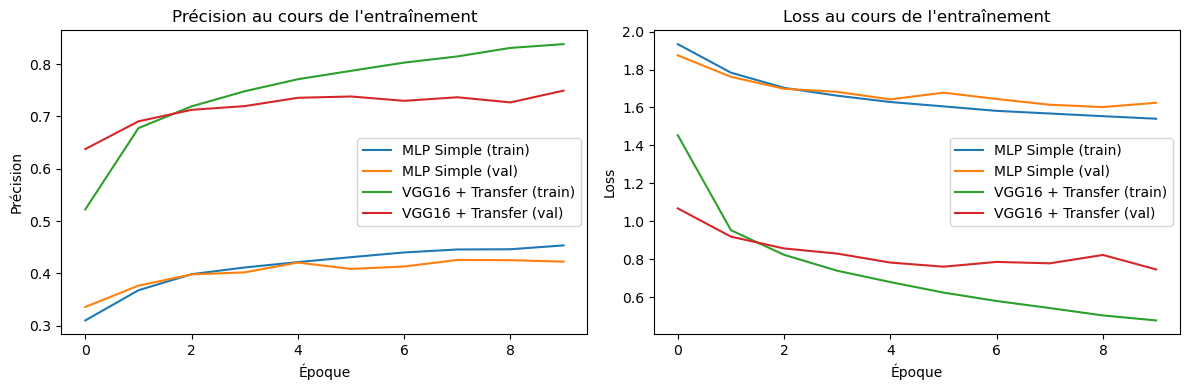

In [12]:
# Visualisation des courbes d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='MLP Simple (train)')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Simple (val)')
plt.plot(history_transfer.history['accuracy'], label='VGG16 + Transfer (train)')
plt.plot(history_transfer.history['val_accuracy'], label='VGG16 + Transfer (val)')
plt.title("Précision au cours de l'entraînement")
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='MLP Simple (train)')
plt.plot(history_mlp.history['val_loss'], label='MLP Simple (val)')
plt.plot(history_transfer.history['loss'], label='VGG16 + Transfer (train)')
plt.plot(history_transfer.history['val_loss'], label='VGG16 + Transfer (val)')
plt.title("Loss au cours de l'entraînement")
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()